### 1. Import all necessary libraries

In [1]:
import sys
import os
import pandas as pd 
import numpy as np 
import scipy as sp 
import sklearn 

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### 2. Read all stock data

In [2]:
df = pd.read_csv('/Users/jiviteshshah/University/Machine learning/Project/stock-time-series-20050101-to-20171231/all_stocks_2006-01-01_to_2018-01-01.csv', parse_dates=['Date'])

In [3]:
df.Date = pd.to_datetime(df.Date)

In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,93587.000000,93602.000000,93592.000000,93612.000000,9.361200e+04
mean,85.623260,86.387045,84.836664,85.641753,2.015667e+07
std,108.151723,108.956365,107.225361,108.121106,3.442108e+07
min,6.750000,7.170000,0.000000,6.660000,0.000000e+00
25%,33.950000,34.290000,33.600000,33.960000,5.040180e+06
50%,60.040000,60.630000,59.490000,60.050000,9.701142e+06
75%,94.000000,94.740000,93.250000,94.012500,2.075222e+07
max,1204.880000,1213.410000,1191.150000,1195.830000,8.432640e+08


### 3. Data Cleaning

In [5]:
df.isnull().sum()

Date       0
Open      25
High      10
Low       20
Close      0
Volume     0
Name       0
dtype: int64

In [6]:
df[df.Open.isnull()]

,Date,Open,High,Low,Close,Volume,Name
2913,2017-07-31,NaN,201.66,NaN,201.17,1833625,MMM
5933,2017-07-31,NaN,85.70,NaN,85.23,3079797,AXP
11972,2017-07-31,NaN,NaN,NaN,242.46,5777271,BA
14992,2017-07-31,NaN,NaN,NaN,113.95,4486013,CAT
18012,2017-07-31,NaN,110.00,NaN,109.19,7561205,CVX
24051,2017-07-31,NaN,NaN,45.79,45.84,13622891,KO
25815,2012-08-01,NaN,NaN,NaN,49.14,0,DIS
27071,2017-07-31,NaN,110.14,NaN,109.93,6815349,DIS
30091,2017-07-31,NaN,80.39,NaN,80.04,12820175,XOM
33111,2017-07-31,NaN,25.69,NaN,25.61,30616287,GE


In [7]:
gdf = df[df.Name == 'AABA']
cdf = df[df.Name == 'CAT']
cdf[~cdf.Date.isin(gdf.Date)]

,Date,Open,High,Low,Close,Volume,Name
13147,2010-04-01,63.29,64.2,63.29,63.99,7830447,CAT


In [8]:
df.set_index('Date', inplace=True)

#Backfill `Open` column
values = np.where(df['2017-07-31']['Open'].isnull(), df['2017-07-28']['Open'], df['2017-07-31']['Open'])
df['2017-07-31']= df['2017-07-31'].assign(Open=values.tolist())

values = np.where(df['2017-07-31']['Close'].isnull(), df['2017-07-28']['Close'], df['2017-07-31']['Close'])
df['2017-07-31']= df['2017-07-31'].assign(Close=values.tolist())

values = np.where(df['2017-07-31']['High'].isnull(), df['2017-07-28']['High'], df['2017-07-31']['High'])
df['2017-07-31']= df['2017-07-31'].assign(High=values.tolist())

values = np.where(df['2017-07-31']['Low'].isnull(), df['2017-07-28']['Low'], df['2017-07-31']['Low'])
df['2017-07-31']= df['2017-07-31'].assign(Low=values.tolist())

df.reset_index(inplace=True)

In [9]:
missing_data_stocks = ['CSCO','AMZN','INTC','AAPL','MSFT','MRK','GOOGL', 'AABA']
columns = df.columns.values

In [10]:
for stock in missing_data_stocks:
    tdf = df[(df.Name == stock) & (df.Date == '2014-03-28')].copy()
    tdf.Date = '2014-04-01'
    pd.concat([df, tdf])
print("Complete")

Complete


In [11]:
df[(df.Name == 'CSCO') & (df.Date == '2014-04-01')]

,Date,Open,High,Low,Close,Volume,Name
20192,2014-04-01,22.33,23.31,22.3,23.1,80113826,CSCO


In [12]:
df[df.Open.isnull()]

,Date,Open,High,Low,Close,Volume,Name
25815,2012-08-01,NaN,NaN,NaN,49.14,0,DIS


In [13]:
df = df[~((df.Date == '2012-08-01') & (df.Name == 'DIS'))]

In [14]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [15]:
ibm_data = df[df.Name == 'IBM'].copy()

In [16]:
ibm_data.drop(['Name'],1,inplace=True)

In [17]:
ibm_data.head()

,Date,Open,High,Low,Close,Volume
39258,2006-01-03,82.45,82.55,80.81,82.06,11715200
39259,2006-01-04,82.20,82.50,81.33,81.95,9840600
39260,2006-01-05,81.40,82.90,81.00,82.50,7213500
39261,2006-01-06,83.95,85.03,83.41,84.95,8197400
39262,2006-01-09,84.10,84.25,83.38,83.73,6858200


### 3. Visualize

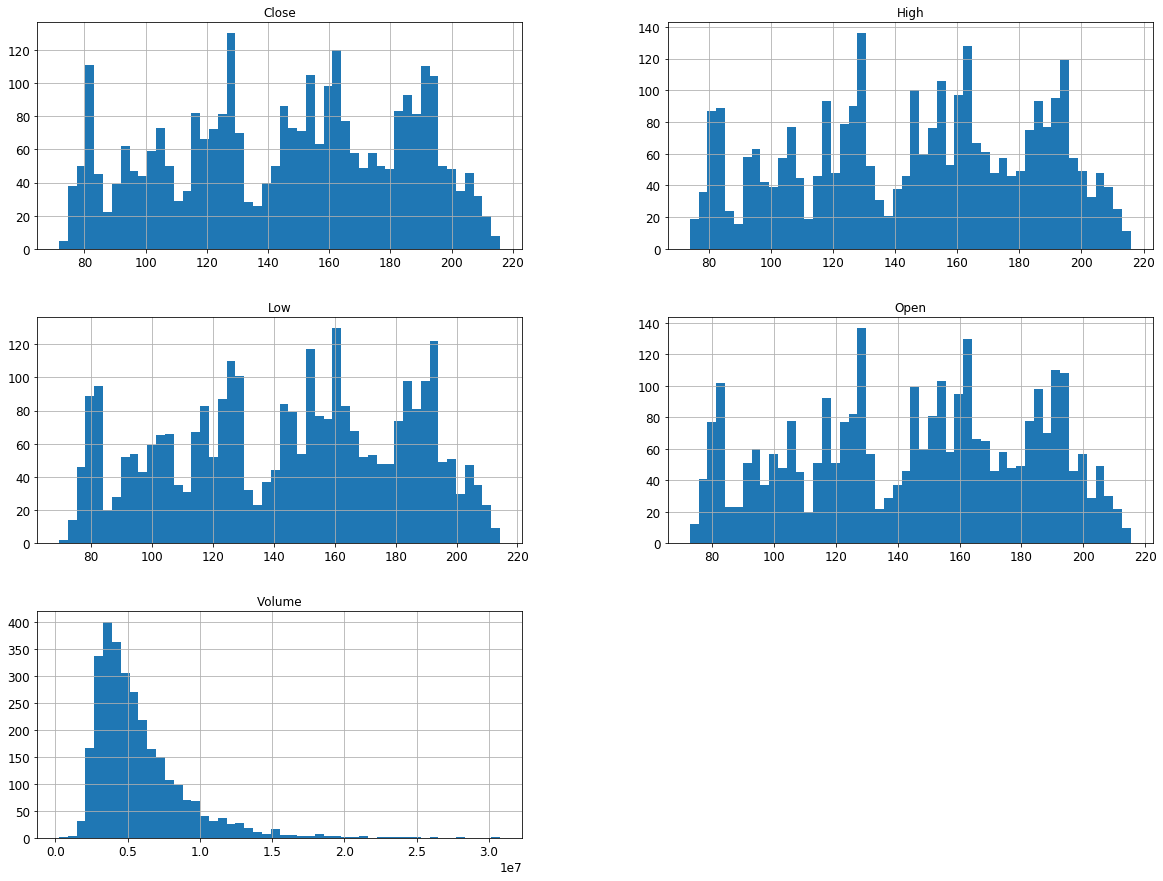

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
ibm_data.hist(bins=50, figsize=(20,15))
plt.show()

### 4. Split data

In [19]:
ibm_data.describe()

,Open,High,Low,Close,Volume
count,3020.000000,3020.000000,3020.000000,3020.000000,3.020000e+03
mean,145.515311,146.681738,144.471387,145.617278,5.773301e+06
std,37.548728,37.613446,37.471435,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.407500,117.765000,115.500000,116.525000,3.622681e+06
50%,149.605000,150.330000,148.425000,149.315000,4.928852e+06
75%,178.437500,179.762500,177.320000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


In [20]:
# 2017 would be training and before that would be test
ibm_train = ibm_data[ibm_data['Date'] < '2017-01-01']
ibm_train = ibm_train.drop("Date", axis = 1)

In [21]:
ibm_test = ibm_data[ibm_data['Date'] >= '2017-01-01']
ibm_test = ibm_test.drop("Date", axis = 1)

In [22]:
ibm_train_X = ibm_train.drop("Close", axis=1) # drop labels for training set
ibm_train_y = ibm_train["Close"].copy()

In [23]:
ibm_test_X = ibm_test.drop("Close", axis=1) # drop labels for training set
ibm_test_y = ibm_test["Close"].copy()

No need to normalize / scale data. It is important only for deep learning algorithms

### 5. Models

RandomForestRegressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [25]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(ibm_train_X, ibm_train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [26]:
train_predictions = forest_reg.predict(ibm_train_X)
forest_mse = mean_squared_error(ibm_train_y, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.37116627556529175

Lasso

In [37]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [39]:
alphas = np.arange(100,1000)
grid_lasso = GridSearchCV(estimator=Lasso(random_state=42),param_grid=dict(alpha=alphas), cv=10, scoring='r2')
grid_lasso.fit(ibm_train_X, ibm_train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([100, 101, ..., 998, 999])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [40]:
lasso_predictions = grid_lasso.predict(ibm_train_X)
lasso_mse = mean_squared_error(ibm_train_y, lasso_predictions)
lasso_mse = np.sqrt(lasso_mse)
lasso_mse

3.03890383882046

Ridge

In [48]:
from sklearn.linear_model import Ridge

In [49]:
grid_ridge = GridSearchCV(estimator=Ridge(random_state=42),param_grid=dict(alpha=alphas), cv=10, scoring='r2')
grid_ridge.fit(ibm_train_X, ibm_train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([100, 101, ..., 998, 999])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [50]:
ridge_predictions = grid_ridge.predict(ibm_train_X)
ridge_mse = mean_squared_error(ibm_train_y, ridge_predictions)
ridge_mse = np.sqrt(ridge_mse)
ridge_mse

0.7011917163982961

SGD

In [51]:
from sklearn.linear_model import SGDRegressor

In [54]:
sgd = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd.fit(ibm_train_X, ibm_train_y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [55]:
sgd_predictions = sgd.predict(ibm_train_X)
sgd_mse = mean_squared_error(ibm_train_y, sgd_predictions)
sgd_mse = np.sqrt(sgd_mse)
sgd_mse

1.5450264267005962e+23

Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression

In [61]:
lin_reg = LinearRegression()
lin_reg.fit(ibm_train_X, ibm_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
lin_predictions = lin_reg.predict(ibm_train_X)
lin_mse = mean_squared_error(ibm_train_y, lin_predictions)
lin_mse = np.sqrt(lin_mse)
poly_mse

0.6992928777939759